In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.random import sample_without_replacement
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_reducido = pd.read_csv("C:/Users/mlard/OneDrive/Escritorio/Mateo/Org de Datos/tp3Github/Org-Datos-Grupo-19/train_data_final.csv")


Parte 2
1) Exploracion, preprocesamiento y transformacion de datos

a) Visualizacion de datos

In [3]:
df_reducido.head(5)

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,2518955,743d55408505dee752adc6e62b273f4397db6e89f19034...,2017-08-10,0.947242,0.002204,0.008002,1.007516,0.002830,0.453227,0.005992,...,NaN,NaN,0.003183,0.005264,0.007173,NaN,0.009359,0.004306,0.002719,0
1,1781039,522c85a354bfec790067b54e9db7353d20d4709ae5dc93...,2017-07-04,0.757648,0.002076,0.008751,0.814083,0.000408,0.155700,0.004156,...,NaN,NaN,1.000928,0.005655,0.891417,0.14907,1.009381,0.007953,0.095926,0
2,1488700,4488928018c20bf6261e69c8a94a47b6206a2fe91480b8...,2017-07-29,0.392041,0.005770,0.029682,0.810262,0.006672,0.180378,0.005028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3174307,9296e983c3e4f99b046952397fc4ba950abf1032a9bd6c...,2017-03-30,0.673978,0.588604,0.295201,0.024650,0.007951,0.125583,0.008760,...,NaN,NaN,0.003558,0.008268,0.000429,NaN,0.005009,0.003020,0.002798,1
4,1379981,3fa10314686e0e51d8f76235eceab91d70aa3f24a98c3e...,2018-01-17,0.778075,0.006930,0.056721,0.819369,0.004922,0.089214,0.006884,...,NaN,NaN,0.004670,0.000125,0.003151,NaN,0.008442,0.000819,0.000342,0


In [4]:
df_reducido.shape

(276572, 192)

In [5]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276572 entries, 0 to 276571
Columns: 192 entries, Unnamed: 0 to target
dtypes: float64(185), int64(3), object(4)
memory usage: 405.1+ MB


American Airlines en la descripcion de la data del dataset define:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables

Por lo tanto las letras de los nombres de las columnas ya sabemos a que hacen referencia. Nos queda por deducir a que hace referencia el numero que le sigue a la letra.
(Se podria suponer que el numero hace referencia a un individuo, o a un vuelo ?)

In [11]:
#Creo un nuevo dataset con las variables cuantitativas y cualitativas

#Las columnas categorias se encuentran en el kaggle de American Airlines
columnas_categoricas = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
# columnas_totales = df_reducido.columns
columnas_cuantitativas = []
for columna in df_reducido.columns:
    if columna not in columnas_categoricas:
        columnas_cuantitativas.append(columna)
df_cuantitativas = df_reducido[columnas_cuantitativas].copy()
df_categoricas = df_reducido[columnas_categoricas].copy()

In [15]:
df_cuantitativas.head(5)

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,2518955,743d55408505dee752adc6e62b273f4397db6e89f19034...,2017-08-10,0.947242,0.002204,0.008002,1.007516,0.002830,0.453227,0.005992,...,NaN,NaN,0.003183,0.005264,0.007173,NaN,0.009359,0.004306,0.002719,0
1,1781039,522c85a354bfec790067b54e9db7353d20d4709ae5dc93...,2017-07-04,0.757648,0.002076,0.008751,0.814083,0.000408,0.155700,0.004156,...,NaN,NaN,1.000928,0.005655,0.891417,0.14907,1.009381,0.007953,0.095926,0
2,1488700,4488928018c20bf6261e69c8a94a47b6206a2fe91480b8...,2017-07-29,0.392041,0.005770,0.029682,0.810262,0.006672,0.180378,0.005028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3174307,9296e983c3e4f99b046952397fc4ba950abf1032a9bd6c...,2017-03-30,0.673978,0.588604,0.295201,0.024650,0.007951,0.125583,0.008760,...,NaN,NaN,0.003558,0.008268,0.000429,NaN,0.005009,0.003020,0.002798,1
4,1379981,3fa10314686e0e51d8f76235eceab91d70aa3f24a98c3e...,2018-01-17,0.778075,0.006930,0.056721,0.819369,0.004922,0.089214,0.006884,...,NaN,NaN,0.004670,0.000125,0.003151,NaN,0.008442,0.000819,0.000342,0


Comenzamos con los graficos

<AxesSubplot:>

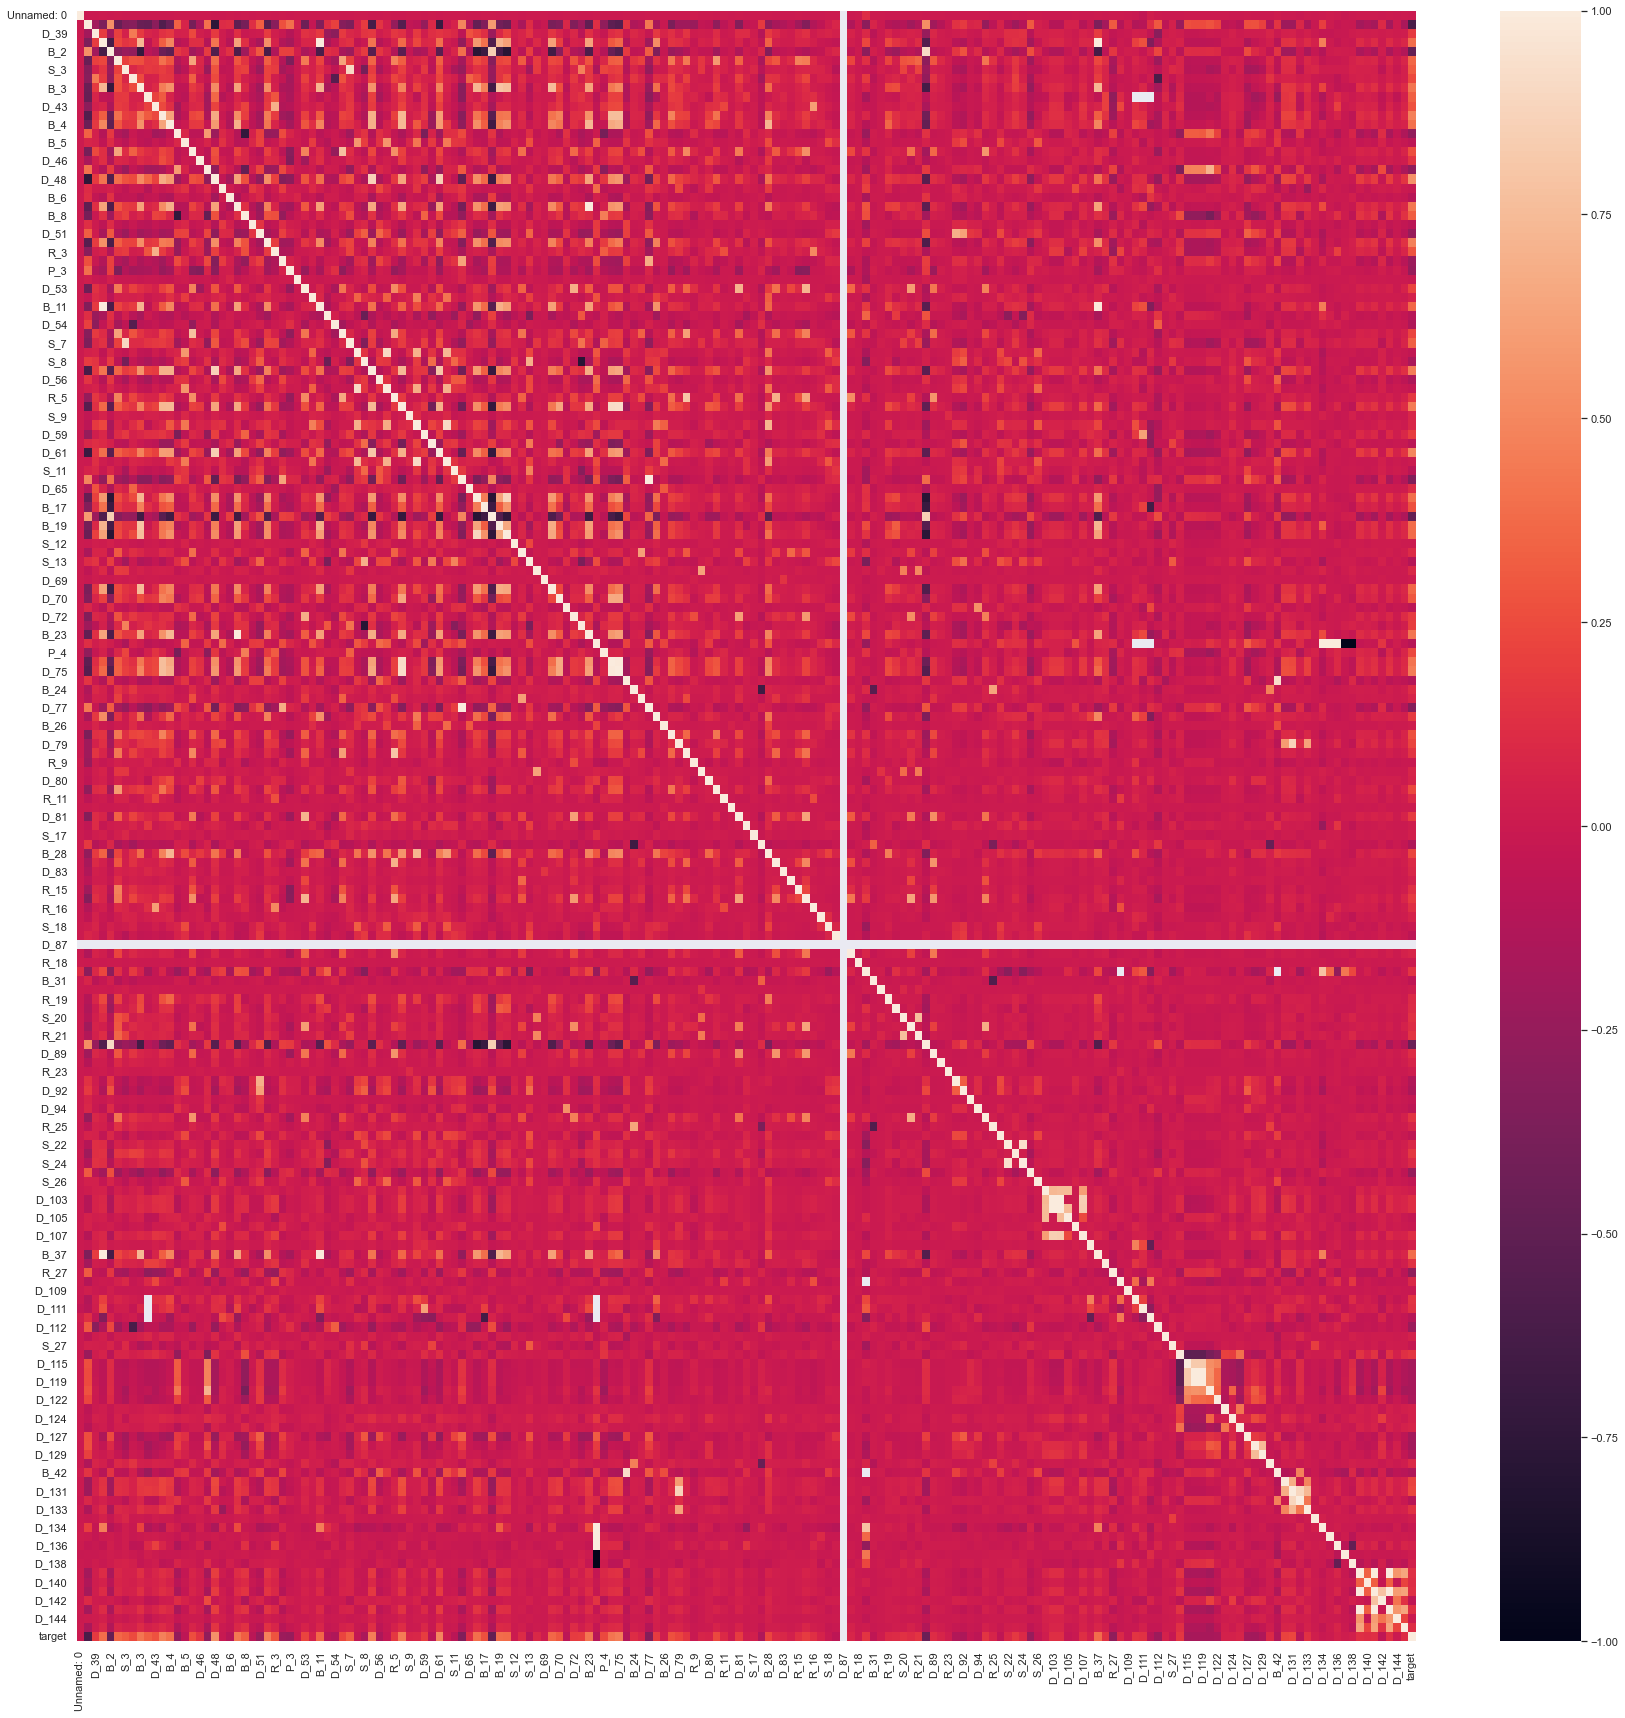

In [16]:
#Correlacion de Pearson
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(df_cuantitativas.corr(method = "pearson"))

In [9]:
df_cuantitativas.corr(method = "pearson")

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
Unnamed: 0,1.000000,-0.001059,-0.000673,0.001139,-0.000415,0.002182,-0.002452,-0.000080,-0.000755,-0.001544,...,-0.017567,-0.003760,0.000269,0.001840,0.000227,-0.000988,0.000249,-0.001865,0.000739,-0.003246
P_2,-0.001059,1.000000,-0.188916,-0.366659,0.545147,-0.465730,-0.332421,-0.317509,-0.454234,-0.469292,...,-0.010382,-0.021162,-0.183753,-0.134921,-0.179388,0.100299,-0.183763,0.005269,-0.163097,-0.609442
D_39,-0.000673,-0.188916,1.000000,0.181912,-0.194391,0.196931,0.052907,0.439796,0.173409,0.068134,...,-0.014086,0.008572,0.030864,0.021493,0.030961,0.013961,0.030884,0.010737,0.022893,0.176520
B_1,0.001139,-0.366659,0.181912,1.000000,-0.631564,0.231405,0.151530,0.187335,0.728532,-0.057754,...,-0.003662,-0.011607,0.104117,0.054074,0.103508,0.007545,0.104158,0.037895,0.078824,0.386185
B_2,-0.000415,0.545147,-0.194391,-0.631564,1.000000,-0.304911,-0.232457,-0.258866,-0.714868,-0.083759,...,0.022757,0.015137,-0.155493,-0.093418,-0.153625,0.019095,-0.155554,-0.040553,-0.124552,-0.480921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_142,-0.000988,0.100299,0.013961,0.007545,0.019095,-0.008579,-0.066794,0.005416,0.013932,-0.060222,...,-0.008837,0.034486,0.005644,-0.038859,0.782006,1.000000,-0.009269,0.414772,0.140349,-0.058096
D_143,0.000249,-0.183763,0.030884,0.104158,-0.155554,0.082815,0.048598,0.052554,0.131408,0.029625,...,-0.019856,-0.099402,0.999373,0.327365,0.997556,-0.009269,1.000000,0.567499,0.644826,0.128630
D_144,-0.001865,0.005269,0.010737,0.037895,-0.040553,0.004274,-0.019429,0.013002,0.043068,-0.055404,...,-0.014648,-0.036997,0.568745,-0.038366,0.594359,0.414772,0.567499,1.000000,0.218569,-0.002666
D_145,0.000739,-0.163097,0.022893,0.078824,-0.124552,0.074168,0.046060,0.045798,0.105971,0.044187,...,-0.004214,-0.076022,0.644770,0.211607,0.631448,0.140349,0.644826,0.218569,1.000000,0.116041
